In [1]:
from  tensorflow.keras.models import load_model
model=load_model('saved_models/audio_classification.keras')

In [2]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,232 (532.16 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 90,822 (354.78 KB)

In [5]:
!pip install graphviz

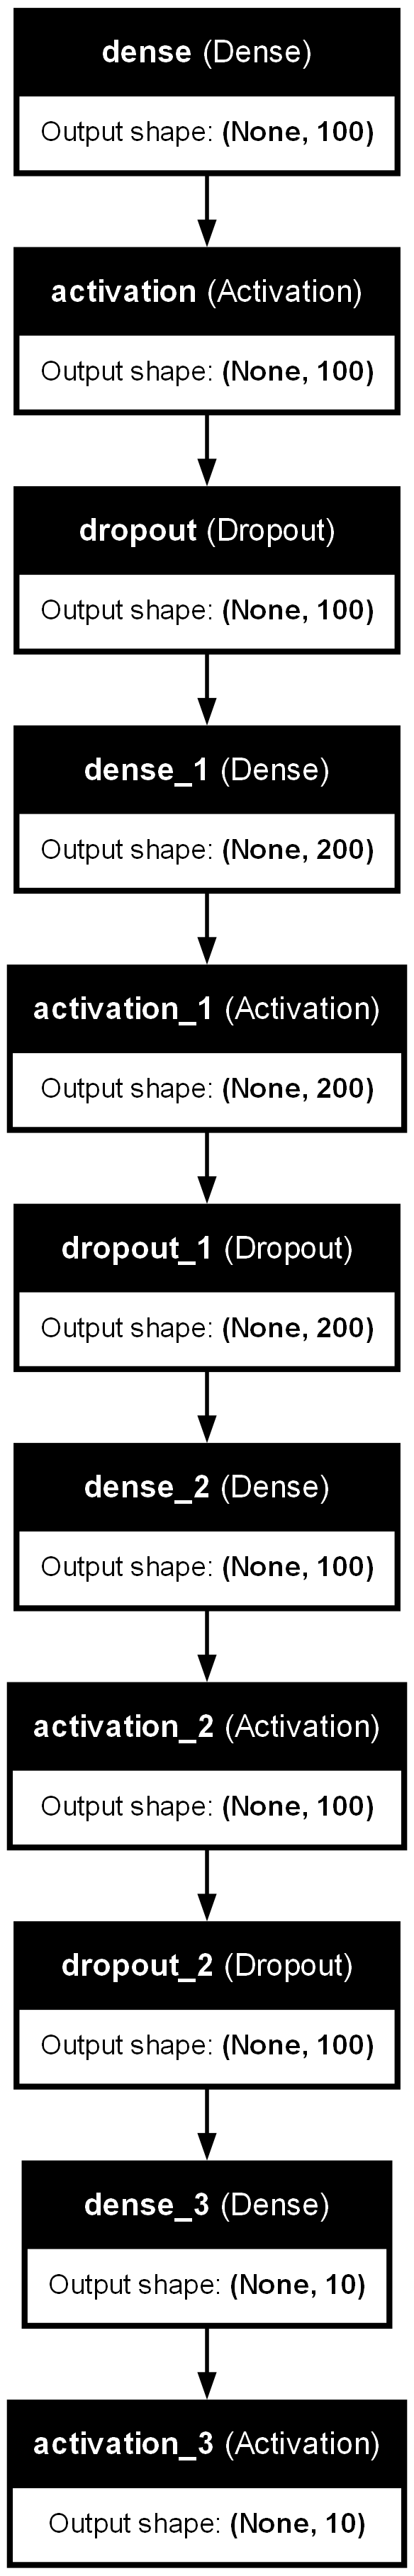

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image(filename='model_plot.png')

In [5]:
!pip install neuralplot
%matplotlib notebook

  Obtaining dependency information for neuralplot from https://files.pythonhosted.org/packages/40/f6/ebbe386f3b16c4a42c561f46e28d173f6187f932689a0099a404791873cc/neuralplot-0.0.8-py3-none-any.whl.metadata


DEPRECATION: neuralplot 0.0.8 has a non-standard dependency specifier matplotlib>=3.1numpy>=1.16. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of neuralplot or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


ImportError: cannot import name 'neuralplot' from 'neuralplot' (D:\anaconda\Lib\site-packages\neuralplot.py)

In [7]:
import neuralplot
neuralplot(model=model,grid=True,connection=True,linewidth=0.1)

TypeError: 'module' object is not callable

In [14]:
import pandas as pd
df=pd.read_csv('features.csv')
df.head()

,feature,class
0,[-217.35526 70.22339 -130.38527 -5...,dog_bark
1,[-4.2409818e+02 1.0934077e+02 -5.2919525e+01 ...,children_playing
2,[-4.5879114e+02 1.2138419e+02 -4.6520657e+01 ...,children_playing
3,[-413.89984 101.66373 -35.42945 5...,children_playing
4,[-4.4660352e+02 1.1368541e+02 -5.2402206e+01 ...,children_playing


In [29]:
filename='UrbanSound8K/6988-5-0-1.wav'

In [31]:
import librosa

In [32]:
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-123.35531     161.165       -32.05638      26.54505       7.4690647
   20.907703      3.5433857    19.11232       1.4510367    17.02853
   -1.9447076    13.308167      2.827761      4.2558513     0.2078307
    7.980449     -1.639762      4.9821143     3.0430987     4.6154933
    3.9651182     5.252917      3.651902      3.1742916     8.322484
    3.7055826     6.356173      4.725411      6.0859036     4.195359
    3.1331804     1.4049457     1.9591782     0.75924504    3.040476
    2.2844677     4.3350463     1.1535218     3.72543       2.8396215 ]
[[-123.35531     161.165       -32.05638      26.54505       7.4690647
    20.907703      3.5433857    19.11232       1.4510367    17.02853
    -1.9447076    13.308167      2.827761      4.2558513     0.2078307
     7.980449     -1.639762      4.9821143     3.0430987     4.6154933
     3.9651182     5.252917      3.651902      3.1742916     8.322484
     3.7055826     6.356173      4.725411      6.0859036     4.195359
     3.1331804     1.

array(['engine_idling'], dtype='<U16')

In [33]:
newsound='UrbanSound8K/ytsoundchildren.mp3'

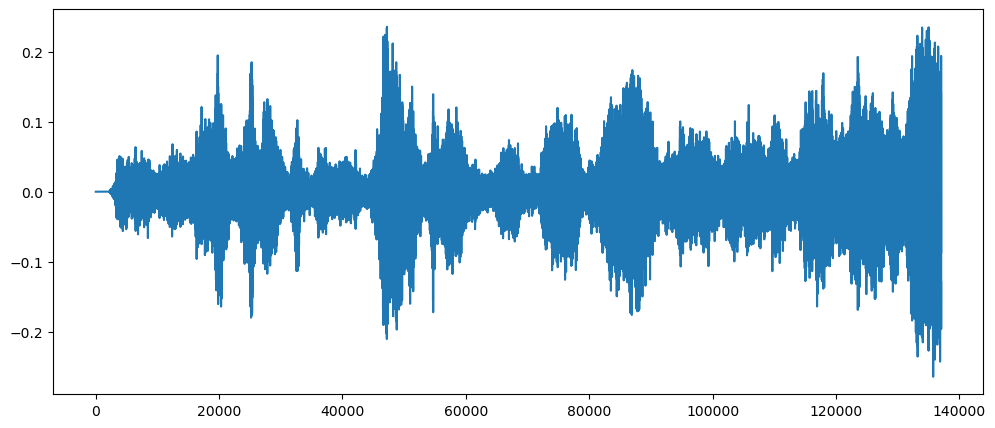

In [35]:
audio,sample_rate=librosa.load(newsound)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(audio)

In [38]:
from IPython.display import Audio
audio, sample_rate = librosa.load(newsound, sr=None)

# Play the audio in the Jupyter Notebook
Audio(audio, rate=sample_rate)

In [36]:
audio, sample_rate = librosa.load(newsound, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.5296397e+02  7.9073357e+01 -9.7182121e+01  2.3250528e+01
 -2.9857635e+01  2.8424892e+00 -6.9179206e+00  6.9737417e-01
 -1.3098591e+01 -7.3466716e+00 -1.5333414e+00  7.3902345e-01
  1.1004635e+00 -1.2034578e+01 -2.1906393e+01  1.4668914e+01
 -1.7279570e+01  5.1646197e-01 -9.9716072e+00 -5.2297635e+00
 -9.7649651e+00  4.9824324e-01 -1.1989742e+01  3.7049448e+00
  3.3590024e+00 -8.6492234e-01  5.4751575e-01 -3.1528068e-01
 -8.5621939e+00  1.0352017e+00 -3.4793899e+00 -3.9716177e+00
  1.0993753e-01 -1.6673636e+00 -2.8753088e+00 -4.5952687e+00
 -1.1684322e+00 -2.9631953e+00 -1.8203275e+00  1.1958104e+00]
[[-2.5296397e+02  7.9073357e+01 -9.7182121e+01  2.3250528e+01
  -2.9857635e+01  2.8424892e+00 -6.9179206e+00  6.9737417e-01
  -1.3098591e+01 -7.3466716e+00 -1.5333414e+00  7.3902345e-01
   1.1004635e+00 -1.2034578e+01 -2.1906393e+01  1.4668914e+01
  -1.7279570e+01  5.1646197e-01 -9.9716072e+00 -5.2297635e+00
  -9.7649651e+00  4.9824324e-01 -1.1989742e+01  3.7049448e+00
   3.3590024e+00 

array(['children_playing'], dtype='<U16')